In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

#### CSV file read

In [2]:
products_csv = "/kaggle/input/assignment/data/Products.csv"
customers_csv = "/kaggle/input/assignment/data/Customers.csv"
transactions_csv = "/kaggle/input/assignment/data/Transactions.csv"

products = pd.read_csv(products_csv)
customers = pd.read_csv(customers_csv)
transactions = pd.read_csv(transactions_csv)

In [3]:
#print in proper format
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [4]:
print(products.shape,"\t", products.columns)
print(customers.shape,"\t", customers.columns)
print(transactions.shape,"\t", transactions.columns)

(100, 4) 	 Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
(200, 4) 	 Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
(1000, 7) 	 Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [5]:
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

merged.rename(columns={'Price_y': 'Price'}, inplace=True)
merged.drop(columns=['Price_x'], inplace=True)

print(merged.shape,"\t", merged.columns)

(1000, 12) 	 Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'CustomerName', 'Region', 'SignupDate',
       'ProductName', 'Category', 'Price'],
      dtype='object')


In [6]:
print(products.describe().transpose())
print("\n")
print(customers.describe().transpose())
print("\n")
print(transactions.describe().transpose())
print("\n")
print(merged.describe().transpose())

       count      mean         std    min       25%      50%     75%     max
Price  100.0  267.5517  143.219383  16.08  147.7675  292.875  397.09  497.76


             count unique             top freq
CustomerID     200    200           C0185    1
CustomerName   200    200  Kathleen Logan    1
Region         200      4   South America   59
SignupDate     200    179      2022-04-16    3


             count       mean         std    min      25%     50%      75%      max
Quantity    1000.0    2.53700    1.117981   1.00    2.000    3.00     4.00     4.00
TotalValue  1000.0  689.99556  493.144478  16.08  295.295  588.88  1011.66  1991.04
Price       1000.0  272.55407  140.736390  16.08  147.950  299.93   404.40   497.76


             count       mean         std    min      25%     50%      75%      max
Quantity    1000.0    2.53700    1.117981   1.00    2.000    3.00     4.00     4.00
TotalValue  1000.0  689.99556  493.144478  16.08  295.295  588.88  1011.66  1991.04
Price       1000.

1.  #### Quantity sold with category for different regions

In [7]:
region_category_product_sales = (merged.groupby(['Region', 'Category', 'ProductName'])['Quantity'].sum().reset_index())

fig = px.treemap(
    region_category_product_sales,
    path=['Region', 'Category', 'ProductName'],  # Hierarchy of levels: Region > Category > Product
    values='Quantity',                          # Values determine the size of rectangles
    title='Quantity Sold by Region, Category, and Product',
    color='Quantity',                           # Color based on quantity sold
    color_continuous_scale='viridis'
)

fig.show()


2. #### Share of each category by revenue and top 3 selling products in each category with revenue

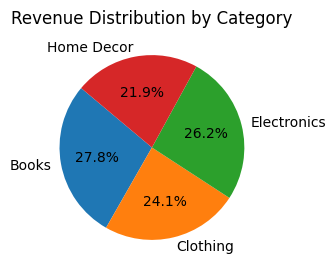

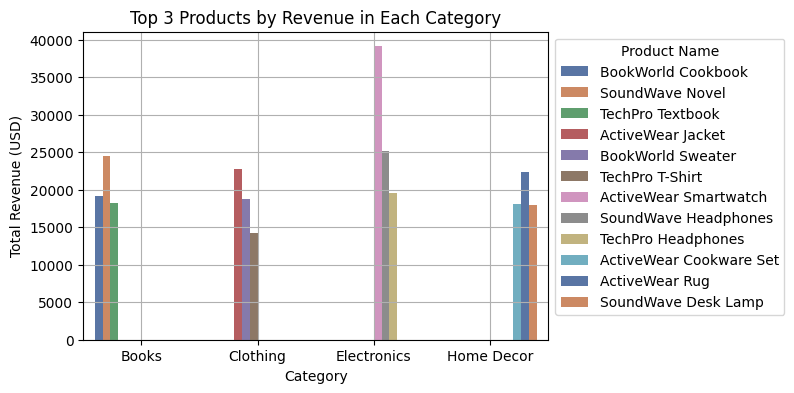

In [8]:
category_revenue = merged.groupby('Category')['TotalValue'].sum().reset_index()
category_product_revenue = (merged.groupby(['Category', 'ProductName'])['TotalValue'].sum().reset_index())
plt.figure(figsize=(3, 3))
plt.pie(category_revenue['TotalValue'], labels=category_revenue['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Category')
plt.show()

category_product_revenue['Rank'] = category_product_revenue.groupby('Category')['TotalValue'].rank(ascending=False, method='dense')
top_3_per_category = category_product_revenue[category_product_revenue['Rank'] <= 3]

plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='TotalValue', hue='ProductName', data=top_3_per_category, palette='deep')
plt.title('Top 3 Products by Revenue in Each Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.legend(title='Product Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


3. #### Top selling 10 products 

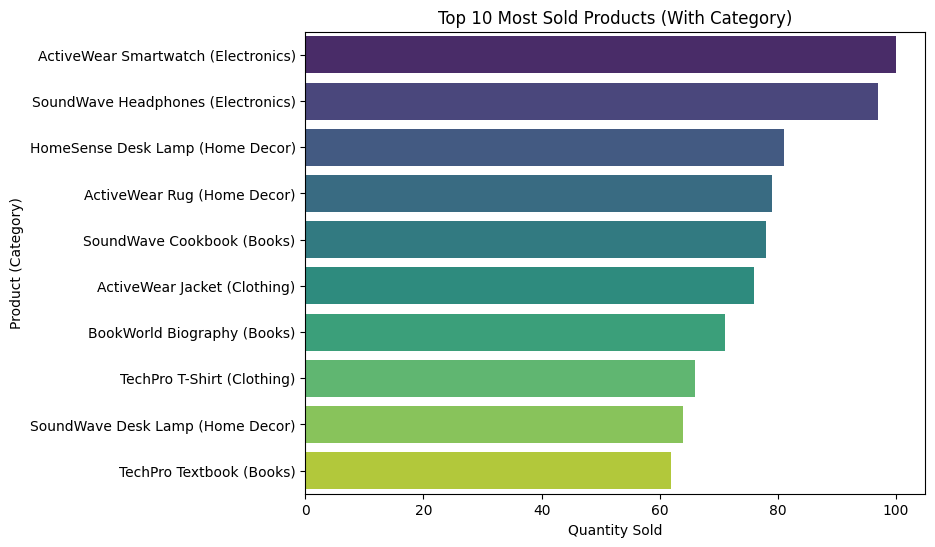

In [9]:
top_products = (merged.groupby(['ProductName', 'Category'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10))

top_products['ProductLabel'] = top_products['ProductName'] + " (" + top_products['Category'] + ")"

plt.figure(figsize=(8, 6))
sns.barplot(x='Quantity', y='ProductLabel', data=top_products, palette='viridis')
plt.title('Top 10 Most Sold Products (With Category)')
plt.xlabel('Quantity Sold')
plt.ylabel('Product (Category)')
plt.show()


4. #### distribution of price spent by users on different categories

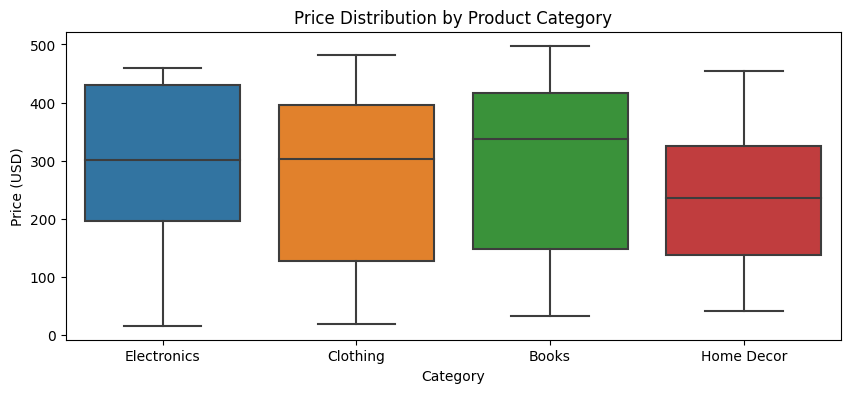

In [10]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Category', y='Price', data=merged)
plt.title('Price Distribution by Product Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.show()